<a href="https://colab.research.google.com/github/Luckas33/MetodosNumericos/blob/master/TrabalhoComputacional_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

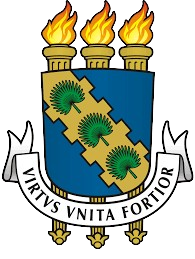
# Universidade Federal do Cear√°  
## Departamento de Computa√ß√£o  

---

### Disciplina: **M√©todos Num√©ricos**  
**Professor:** Jo√£o Paulo do Vale Madeiro  

---

### **Alunos:**
- Lucas de Oliveira Sobral, 556944
- Mateus Andrade Maia, 552593

Link para v√≠deo de apresenta√ß√£o:


# TRABALHO COMPUTACIONAL 2

### 1) Considere os dados abaixo

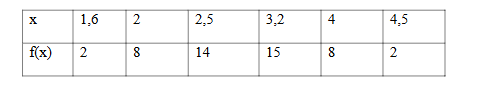


(a)Obter e plotar o gr√°fico da spline quadr√°tica que passa pelos pontos dados;





In [ ]:
"Importando as bibliotecas b√°sicas"
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def subs_retroativas_np(A, b):
    """Resolve Ax=b para uma matriz triangular superior A."""
    n = len(A)
    x = np.zeros(n, dtype=float)
    for i in range(n - 1, -1, -1):
        soma = A[i, i + 1:] @ x[i + 1:]
        x[i] = (b[i] - soma) / A[i, i]
    return x


In [ ]:
def gauss_np(A, b):
    """
    Aplica a elimina√ß√£o Gaussiana com Pivoteamento Parcial para resolver Ax=b.
    Esta √© uma implementa√ß√£o robusta e numericamente est√°vel.
    """
    A = A.copy().astype(float)
    b = b.copy().astype(float)
    n = len(A)

    for k in range(n - 1):
        # --- In√≠cio do Pivoteamento Parcial ---
        max_row_idx = k + np.argmax(np.abs(A[k:, k]))
        if abs(A[max_row_idx, k]) < 1e-12:
            return None
        if max_row_idx != k:
            A[[k, max_row_idx]] = A[[max_row_idx, k]]
            b[[k, max_row_idx]] = b[[max_row_idx, k]]
        # --- Fim do Pivoteamento ---

        for i in range(k + 1, n):
            m = A[i, k] / A[k, k]
            A[i, k:] -= m * A[k, k:]
            b[i] -= m * b[k]

    if abs(A[n-1, n-1]) < 1e-12:
        return None

    return subs_retroativas_np(A, b)

In [ ]:
def quadratic_spline_coeffs(x_points, y_points):
    """Monta e resolve o sistema de equa√ß√µes para a spline quadr√°tica."""
    n = len(x_points) - 1
    A = np.zeros((3 * n, 3 * n))
    b = np.zeros(3 * n)

    for i in range(n):
        A[2*i, 3*i:3*(i+1)] = [x_points[i]**2, x_points[i], 1]
        b[2*i] = y_points[i]
        A[2*i+1, 3*i:3*(i+1)] = [x_points[i+1]**2, x_points[i+1], 1]
        b[2*i+1] = y_points[i+1]

    for i in range(n - 1):
        row_idx = 2 * n + i
        A[row_idx, 3*i] = 2 * x_points[i+1]
        A[row_idx, 3*i+1] = 1
        A[row_idx, 3*(i+1)] = -2 * x_points[i+1]
        A[row_idx, 3*(i+1)+1] = -1

    # Condi√ß√£o de contorno robusta: a_0 = 0
    A[3*n-1, 0] = 1
    b[3*n-1] = 0

    solution = gauss_np(A, b)

    if solution is None:
        print("Erro: O sistema de equa√ß√µes √© singular ou o solver falhou.")
        return None

    coeffs = solution.reshape((n, 3))
    return coeffs

In [ ]:
def evaluate_quadratic_spline(x_points, coeffs, x_eval):
    """Avalia a spline quadr√°tica em um determinado ponto x_eval."""
    for i in range(len(x_points) - 1):
        if x_points[i] <= x_eval <= x_points[i+1]:
            a, b, c = coeffs[i]
            return a * x_eval**2 + b * x_eval + c
    if x_eval < x_points[0]:
        a, b, c = coeffs[0]
    else:
        a, b, c = coeffs[-1]
    return a * x_eval**2 + b * x_eval + c



Coeficientes (a, b, c) calculados para cada segmento:
Segmento 0 ([1.6, 2.0]) 	: S(x) =  0.0000x¬≤ + 15.0000x + -22.0000
Segmento 1 ([2.0, 2.5]) 	: S(x) = -6.0000x¬≤ + 39.0000x + -46.0000
Segmento 2 ([2.5, 3.2]) 	: S(x) = -10.8163x¬≤ + 63.0816x + -76.1020
Segmento 3 ([3.2, 4.0]) 	: S(x) = -3.2589x¬≤ + 14.7143x +  1.2857
Segmento 4 ([4.0, 4.5]) 	: S(x) = -1.2857x¬≤ + -1.0714x + 32.8571


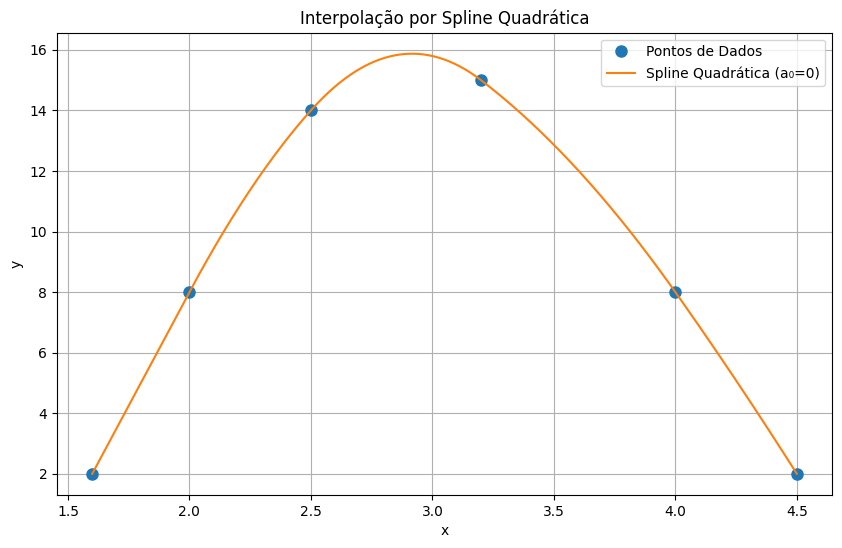

In [ ]:
# --- Bloco Principal de Execu√ß√£o ---
if __name__ == '__main__':
    x_points = np.array([1.6, 2, 2.5, 3.2, 4, 4.5])
    y_points = np.array([2, 8, 14, 15, 8, 2])

    coeffs = quadratic_spline_coeffs(x_points, y_points)

    if coeffs is not None:
        print("Coeficientes (a, b, c) calculados para cada segmento:")
        for i, (a, b, c) in enumerate(coeffs):
            print(f"Segmento {i} ([{x_points[i]}, {x_points[i+1]}]) \t: S(x) = {a:7.4f}x¬≤ + {b:7.4f}x + {c:7.4f}")

        x_fine = np.linspace(min(x_points), max(x_points), 500)
        y_fine = [evaluate_quadratic_spline(x_points, coeffs, x) for x in x_fine]

        plt.figure(figsize=(10, 6))
        plt.plot(x_points, y_points, 'o', markersize=8, label='Pontos de Dados')
        plt.plot(x_fine, y_fine, '-', label='Spline Quadr√°tica (a‚ÇÄ=0)')
        plt.title('Interpola√ß√£o por Spline Quadr√°tica')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.grid(True)
        plt.show()


(b)Obter e plotar o gr√°fico da spline c√∫bica que passa pelos pontos dados;

(c)Estimar o valor de f(2,8) pelos dois m√©todos referidos acima.

In [ ]:
# Spline quadr√°tica

def encontrar_x_para_y(y_alvo, x_points, coeffs):
    solucoes_validas = []
    for i, (a, b, c) in enumerate(coeffs):
        A, B, C = a, b, c - y_alvo
        if abs(A) < 1e-12:
            if abs(B) > 1e-12:
                x_sol = -C / B
                if x_points[i] <= x_sol <= x_points[i+1]:
                    solucoes_validas.append(x_sol)
            continue
        discriminante = B**2 - 4 * A * C
        if discriminante < 0: continue
        sqrt_discriminante = np.sqrt(discriminante)
        x1 = (-B - sqrt_discriminante) / (2 * A)
        x2 = (-B + sqrt_discriminante) / (2 * A)
        if x_points[i] <= x1 <= x_points[i+1]:
            solucoes_validas.append(x1)
        if abs(discriminante) > 1e-9 and (x_points[i] <= x2 <= x_points[i+1]):
             solucoes_validas.append(x2)
    return sorted(list(set(solucoes_validas)))

Coeficientes (a, b, c) calculados:
  S_0(x) = 0.0000x¬≤ + 15.0000x + -22.0000, para x em [1.6, 2.0]
  S_1(x) = -6.0000x¬≤ + 39.0000x + -46.0000, para x em [2.0, 2.5]
  S_2(x) = -10.8163x¬≤ + 63.0816x + -76.1020, para x em [2.5, 3.2]
  S_3(x) = -3.2589x¬≤ + 14.7143x + 1.2857, para x em [3.2, 4.0]
  S_4(x) = -1.2857x¬≤ + -1.0714x + 32.8571, para x em [4.0, 4.5]

Para f(x) = 2.8, os valores de x estimados s√£o: ['1.6533', '4.4363']


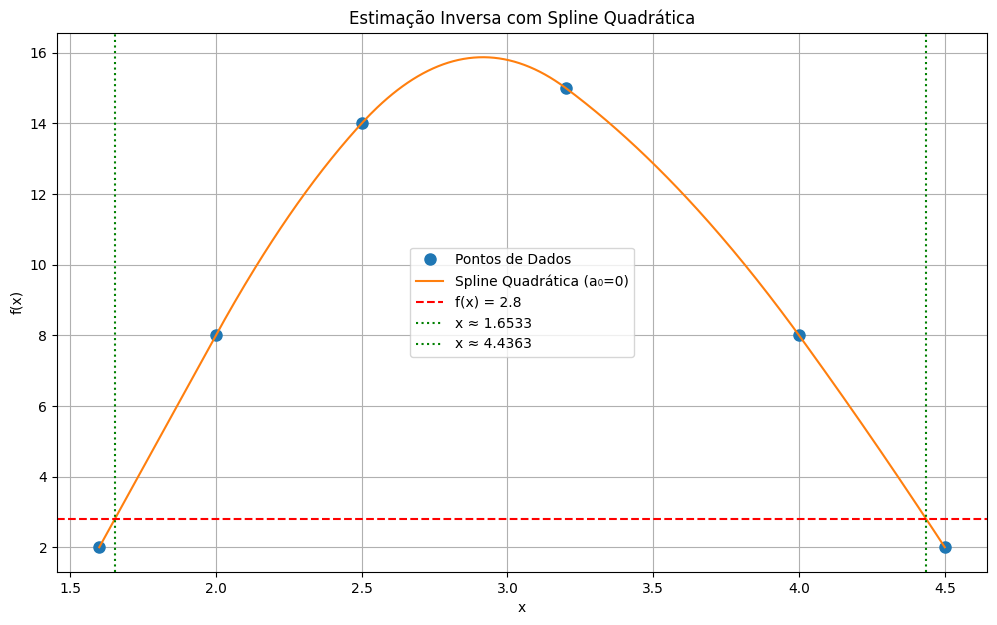

In [ ]:
if __name__ == '__main__':
    x_points = np.array([1.6, 2, 2.5, 3.2, 4, 4.5])
    y_points = np.array([2, 8, 14, 15, 8, 2])

    coeffs = quadratic_spline_coeffs(x_points, y_points)

    if coeffs is not None:
        # --- Plotagem da Spline (como antes) ---
        print("Coeficientes (a, b, c) calculados:")
        for i, (a, b, c) in enumerate(coeffs):
            print(f"  S_{i}(x) = {a:.4f}x¬≤ + {b:.4f}x + {c:.4f}, para x em [{x_points[i]}, {x_points[i+1]}]")

        x_fine = np.linspace(min(x_points), max(x_points), 500)
        y_fine = [evaluate_quadratic_spline(x_points, coeffs, x) for x in x_fine]

        plt.figure(figsize=(12, 7))
        plt.plot(x_points, y_points, 'o', markersize=8, label='Pontos de Dados')
        plt.plot(x_fine, y_fine, '-', label='Spline Quadr√°tica (a‚ÇÄ=0)')

        # --- Exemplo de uso da nova fun√ß√£o ---
        y_alvo = 2.8
        x_encontrados = encontrar_x_para_y(y_alvo, x_points, coeffs)

        print(f"\nPara f(x) = {y_alvo}, os valores de x estimados s√£o: {[f'{x:.4f}' for x in x_encontrados]}")

        # --- Visualiza√ß√£o dos resultados encontrados ---
        plt.axhline(y=y_alvo, color='r', linestyle='--', label=f'f(x) = {y_alvo}')
        for x_sol in x_encontrados:
            plt.axvline(x=x_sol, color='g', linestyle=':', label=f'x ‚âà {x_sol:.4f}')

        # Ajustando a legenda para n√£o ter r√≥tulos duplicados
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys())

        plt.title('Estima√ß√£o Inversa com Spline Quadr√°tica')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.grid(True)
        plt.show()

In [ ]:
# Spline C√∫bica

### 2) Use  interpola√ß√£o  por  spline  c√∫bica  para  a  representa√ß√£o  dos  dados  abaixo,  e determine o valor de ùë•que corresponde a ùëì(ùë•)=0,23 para os seguintes dados tabulados atrav√©s da solu√ß√£o de um problema de raiz do correspondente polin√¥mio c√∫bico.

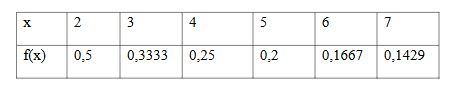

### 3) Efetue  o downloaddo datasetShampoo Sales  Dataset1,  no  ambiente  Python,o qual descreve o n√∫mero de vendas mensais de shampoo longo de um per√≠odo de tr√™s anos,e utilizando o processo de interpola√ß√£o por spline c√∫bica, efetue o processo de up sampling para obter estimativas di√°rias de vendas.
https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv


In [ ]:
"Month","Sales"
"1-01",266.0
"1-02",145.9
"1-03",183.1
"1-04",119.3
"1-05",180.3
"1-06",168.5
"1-07",231.8
"1-08",224.5
"1-09",192.8
"1-10",122.9
"1-11",336.5
"1-12",185.9
"2-01",194.3
"2-02",149.5
"2-03",210.1
"2-04",273.3
"2-05",191.4
"2-06",287.0
"2-07",226.0
"2-08",303.6
"2-09",289.9
"2-10",421.6
"2-11",264.5
"2-12",342.3
"3-01",339.7
"3-02",440.4
"3-03",315.9
"3-04",439.3
"3-05",401.3
"3-06",437.4
"3-07",575.5
"3-08",407.6
"3-09",682.0
"3-10",475.3
"3-11",581.3
"3-12",646.9